# MNIST dataset results

In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
import seaborn as sns

import sys
sys.path.append('../helpers')
from main_loop import setup_experiment, run_experiment

2024-10-15 13:58:15.767961: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Constants

In [2]:
DATA_NAME = "MNIST_data"

EPSILON = 0.2
GRID_STEP = 0.01
ORIGINAL_SAMPLE_COUNT = 1000

TF_SEED = 1

## Set up the experiment

Data loaded: ./../data/MNIST_data.pickle
Done preparing grid: (3800000, 2)


NCMs for labels:   0%|          | 0/10 [00:00<?, ?it/s]

NCMs for labels:   0%|          | 0/10 [00:00<?, ?it/s]

p-values for labels:   0%|          | 0/10 [00:00<?, ?it/s]

dict_keys(['grid_arrays', 'grid_points', 'ps_grid', 'X_train', 'y_train', 'X_test', 'y_test', 'X_prop', 'y_prop', 'X_calib', 'y_calib'])

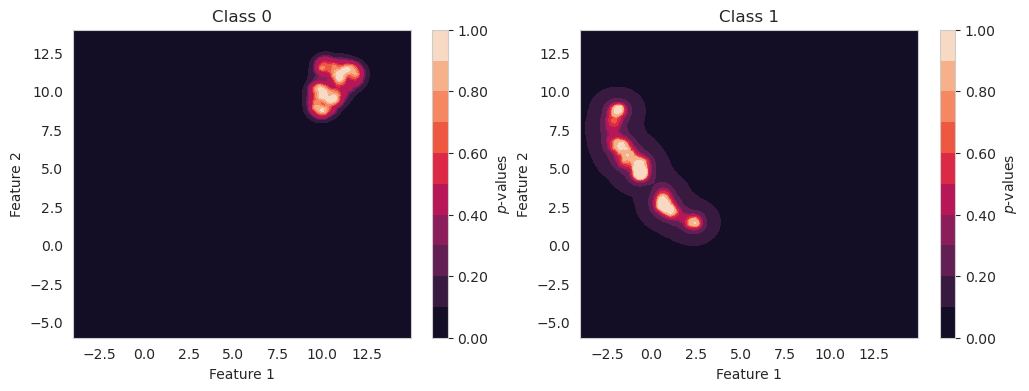

In [3]:
setup_dict = setup_experiment(DATA_NAME, grid_step=GRID_STEP, nr_train_samples=ORIGINAL_SAMPLE_COUNT, prop_size=0.6)
setup_dict.keys()

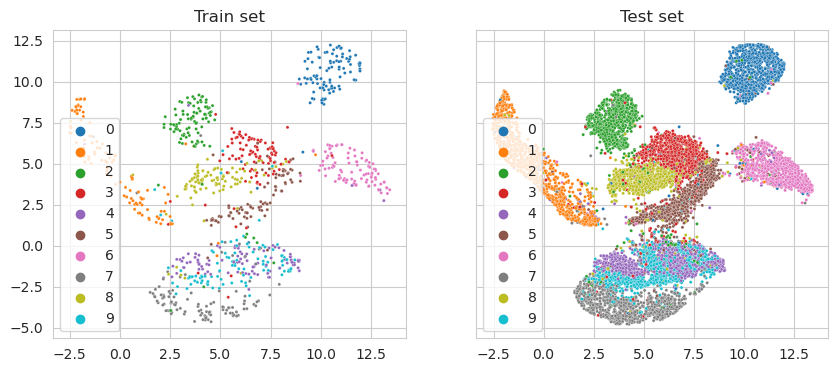

In [4]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.scatterplot(x=setup_dict['X_train'][:, 0], y=setup_dict['X_train'][:, 1], hue=setup_dict['y_train'], palette="tab10", s=5, ax=axs[0])
axs[0].set_title("Train set")
sns.scatterplot(x=setup_dict['X_test'][:, 0], y=setup_dict['X_test'][:, 1], hue=setup_dict['y_test'], palette="tab10", s=5, ax=axs[1])
axs[1].set_title("Test set")

plt.legend()
plt.show()

## Original samples result

In [5]:
run_experiment(setup_dict, is_original=True, tf_seed=TF_SEED)

2024-10-15 13:59:13.943249: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.




Baseline results: ORIGINAL
313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.94      0.54      0.68      1135
           2       0.65      0.88      0.75      1032
           3       0.30      0.87      0.44      1010
           4       0.41      0.04      0.07       982
           5       0.00      0.00      0.00       892
           6       0.49      0.94      0.64       958
           7       0.33      0.95      0.49      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.43     10000
   macro avg       0.31      0.42      0.31     10000
weighted avg       0.32      0.43      0.32     10000



## Extended sample results

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


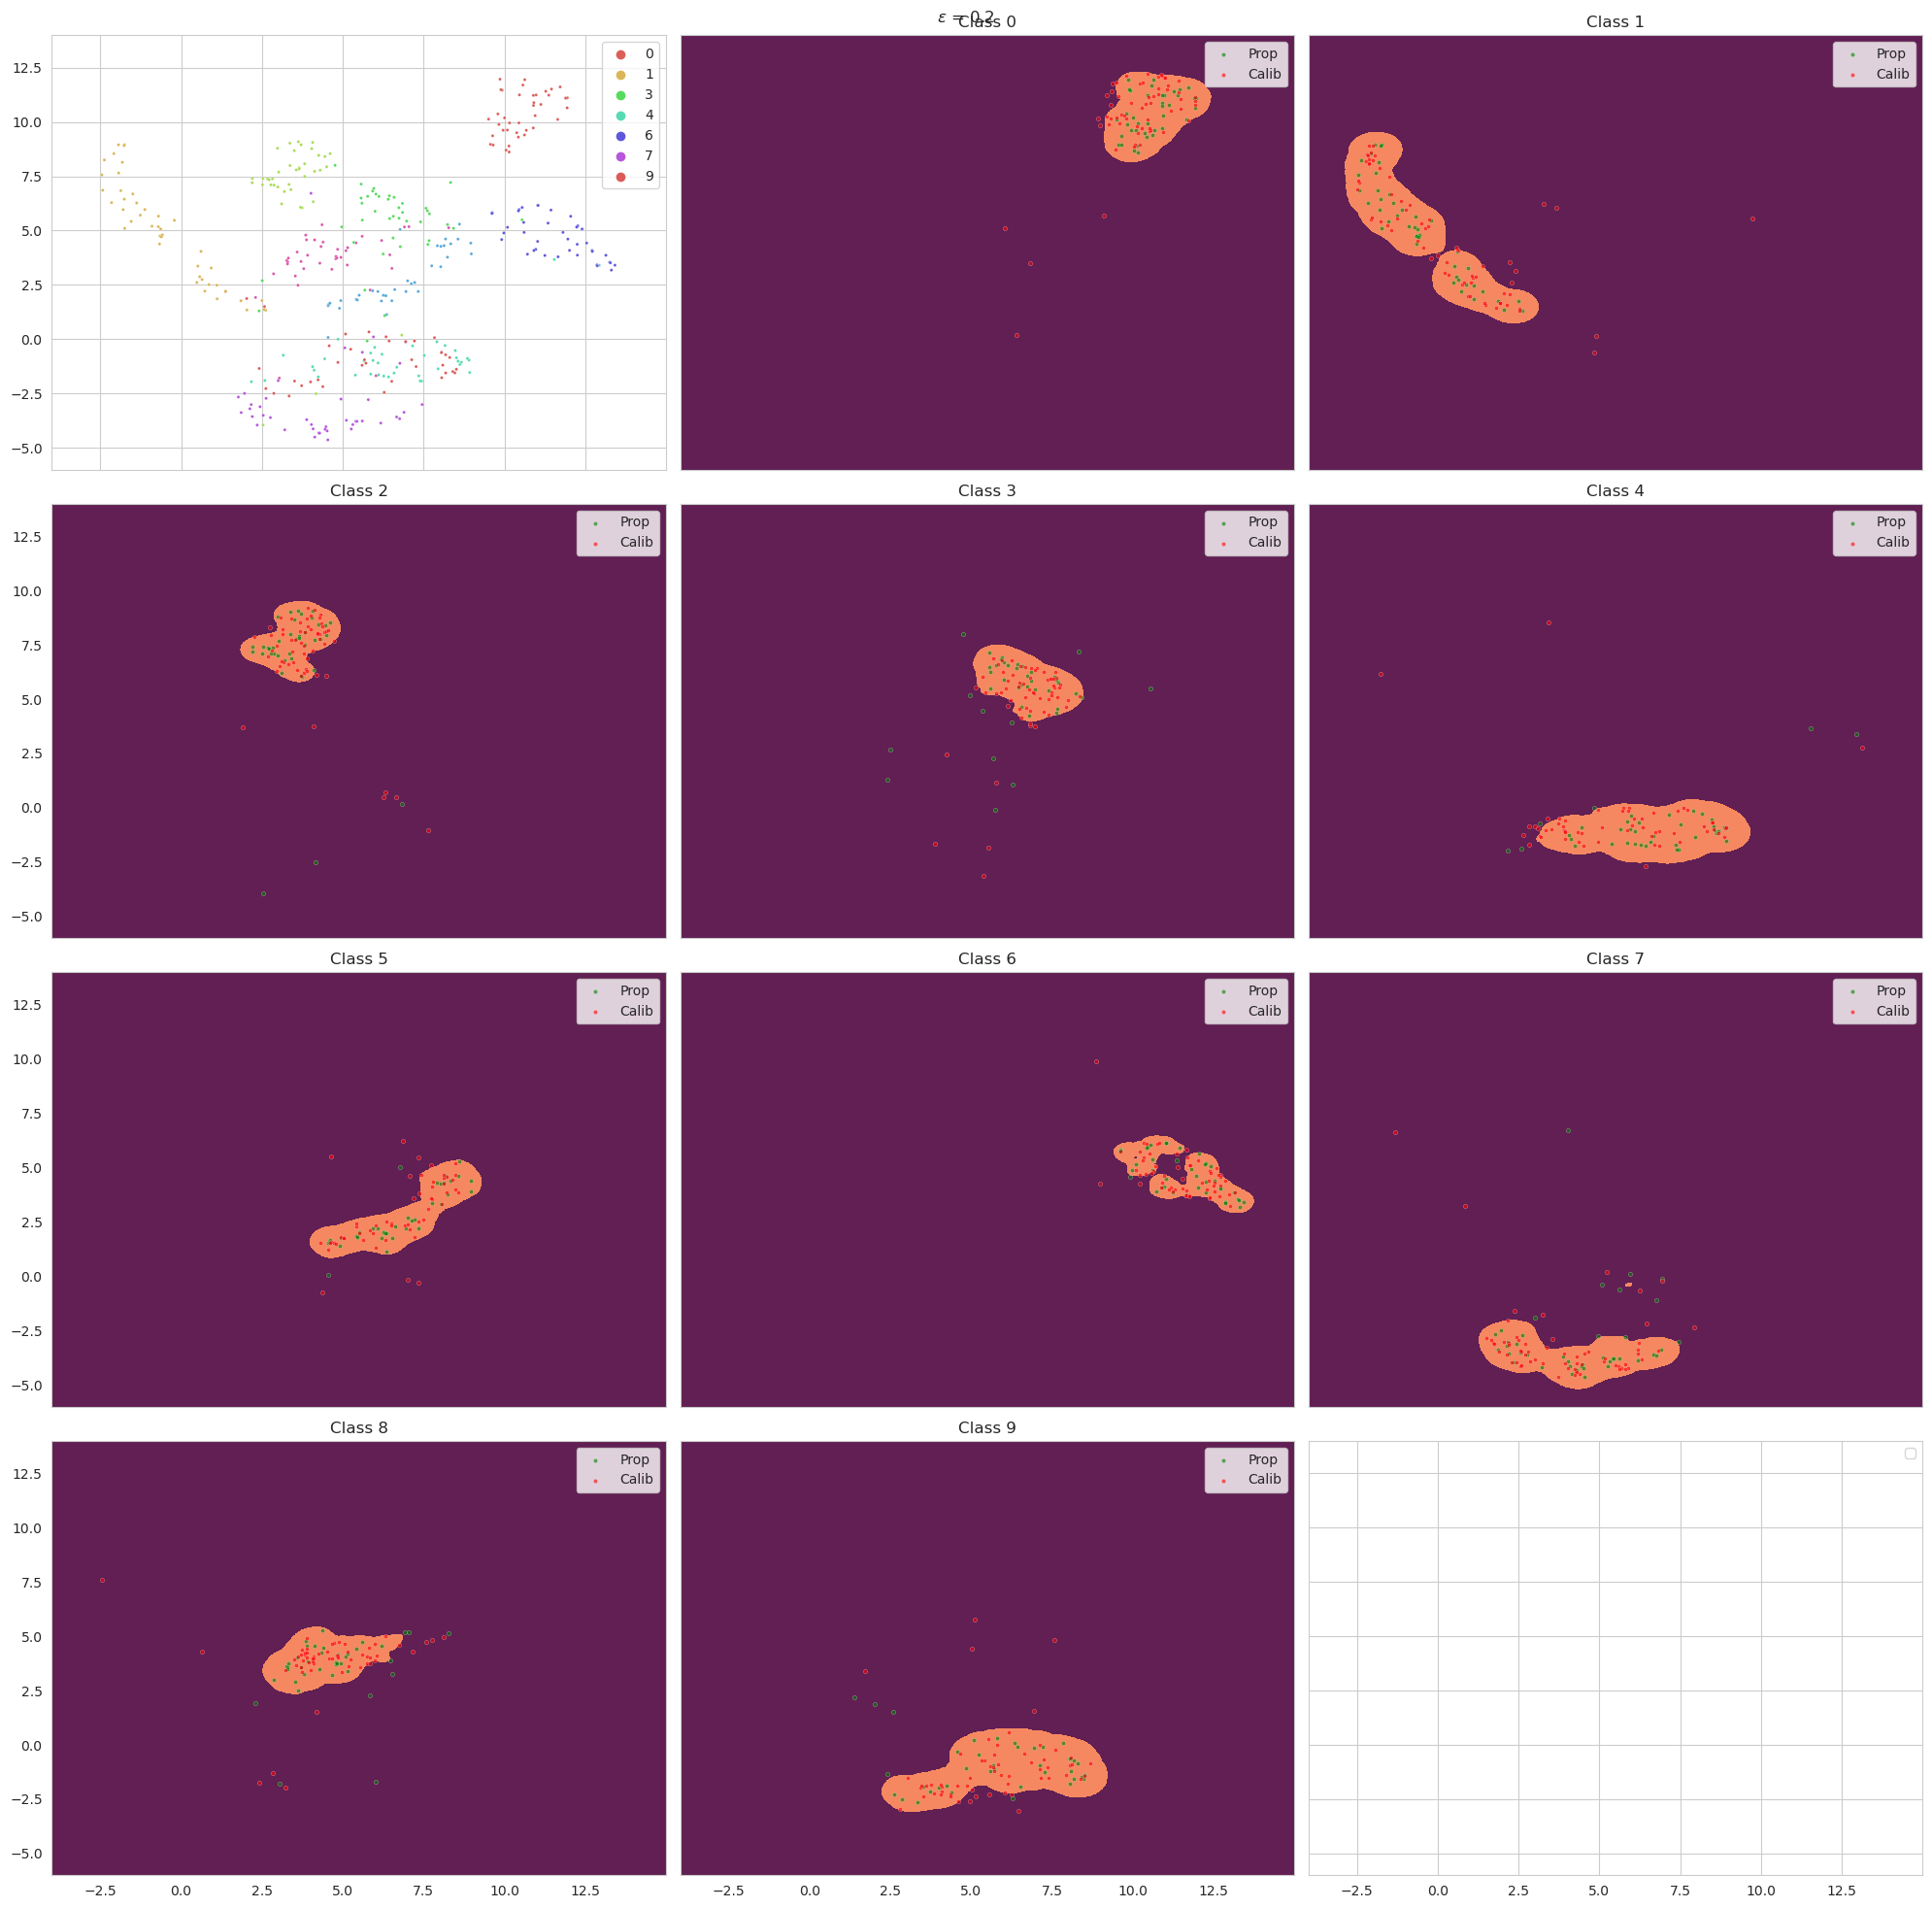

Synthetic samples per class
Label 0: (92648, 2)
Label 1: (160304, 2)
Label 2: (65379, 2)
Label 3: (74557, 2)
Label 4: (138352, 2)
Label 5: (90897, 2)
Label 6: (63062, 2)
Label 7: (105225, 2)
Label 8: (79759, 2)
Label 9: (158201, 2)


Total synthetic samples: (1028384, 2)
ORIGINAL + SYNTHETIC
313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       980
           1       0.90      0.98      0.94      1135
           2       0.98      0.87      0.92      1032
           3       0.88      0.70      0.78      1010
           4       0.48      0.40      0.44       982
           5       0.83      0.86      0.84       892
           6       0.91      0.95      0.93       958
           7       0.92      0.76      0.83      1028
           8       0.78      0.82      0.80       974
           9       0.41      0.59      0.49      1009

    accuracy                           0.79     10000
  

In [6]:
run_experiment(setup_dict, is_o_s=True, epsilon=EPSILON, tf_seed=TF_SEED)